In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import os

VALUES = range(1, 10)
OPS_E = [0, 1]
OPS_T = [2, 3]
NTYPES = ['e', 't']
OP_MAP = ['+', '-', '*', '/']

In [2]:
FLANG = os.path.join('..', 'flang')
# TRAIN = os.path.join(FLANG, 'train_d30.ne.tsv')
# VALID = os.path.join(FLANG, 'valid_d30.ne.tsv')
# TEST = os.path.join(FLANG, 'test_d30.ne.tsv')
TRAIN = os.path.join(FLANG, 'train_d30.ne.small.tsv')
VALID = os.path.join(FLANG, 'valid_d30.ne.small.tsv')
TEST = os.path.join(FLANG, 'test_d30.ne.small.tsv')

In [3]:
def to_value_sd(sd_lst, node_lst):
    if len(sd_lst) == 0:
        node = node_lst[0]
        v = node
    else:
        i = np.argmax(sd_lst)
        child_l, v_l = to_value_sd(sd_lst[:i], node_lst[:i+1])
        child_r, v_r = to_value_sd(sd_lst[i+1:], node_lst[i+1:])
        node = (child_l, child_r)
        if isinstance(v_l, tuple) and not isinstance(v_r, tuple):
            v1, op = v_l[0], v_l[1]
            v2 = v_r
            if op == '/':
                v = str(int(v1) % int(v2))
            else:
                v = str(eval(''.join([v1, op, v2])) % 10)
        else:
            assert not isinstance(v_l, tuple) and not isinstance(v_r, tuple)
            v = (v_l, v_r)

    return node, v

In [4]:
train = []
valid = []
test = []
with open(TRAIN, 'r') as ftrain, open(VALID, 'r') as fvalid, open(TEST, 'r') as ftest:
    for line in ftrain:
        train.append(line.strip().split('\t'))
    for line in fvalid:
        valid.append(line.strip().split('\t'))
    for line in ftest:
        test.append(line.strip().split('\t'))

In [5]:
lens = []
for e in train:
    node_lst, sd_lst, h = e
    lens.append(len(node_lst.split()))
print(np.average(lens))
print(np.var(lens))

22.828
389.98241599999994


In [6]:
train[0]

['4 * 1 - 2 - 3', '1 2 3 4 5 6', '1']

In [7]:
val_lst = []
for node_str, ds_str, h in train:
    ds = list(map(int, ds_str.split()))
    val = to_value_sd(ds, node_str.split())[1]
    val_lst.append(int(val))

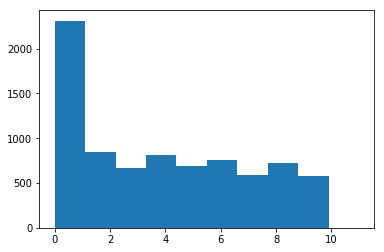

In [8]:
plt.hist(val_lst, bins=10, range=(0, 10+1))
plt.show()

In [9]:
# with open('train_d30.ne.tsv', 'w') as ftrain, \
#     open('valid_d30.ne.tsv', 'w') as fvalid, \
#     open('test_d30.ne.tsv', 'w') as ftest:
#     for es, f in zip([train, valid, test], [ftrain, fvalid, ftest]):
#         for e in es:
#             node_lst, sd_lst, h = e
#             ds = list(map(int, sd_lst.split()))
#             val = to_value_sd(ds, node_lst.split())[1]
#             f.write('\t'.join([node_lst, sd_lst, h, val])+'\n')

In [9]:
with open('train_d30.ne.small.tsv', 'w') as ftrain, \
    open('valid_d30.ne.small.tsv', 'w') as fvalid, \
    open('test_d30.ne.small.tsv', 'w') as ftest:
    for es, f in zip([train, valid, test], [ftrain, fvalid, ftest]):
        for e in es:
            node_lst, sd_lst, h = e
            ds = list(map(int, sd_lst.split()))
            val = to_value_sd(ds, node_lst.split())[1]
            f.write('\t'.join([node_lst, sd_lst, h, val])+'\n')